<br/><font color='red'>Ex. 1:</font> Simulação de uma rede simples de distribuição
---------------

In [1]:
import numpy as np
from sympy import nsolve, sqrt, log, pi, symbols, Array, log

In [5]:
# Bellos, Nalbantis, Tsakiris (2018)
def f(Re, eD):
    """"""
    a = 1/(1 + pow(Re/2712, 8.4))
    b = 1/(1 + pow(Re/(150/eD), 1.8))
    A = pow(64/Re, a)
    B = pow(0.75*log(Re/5.37), 2*(a-1)*b)
    C = pow(0.88*log(6.82/eD), 2*(a-1)*(1-b))
    return A*B*C

def Re(Q, D, nu=1e-6):
    ""
    return 4*Q/(nu*pi*D)

In [7]:
D = 0.15
G = 1e4
g = 9.81
h = 1.0
H = 6.0
eD = 0.26e-3/D

La, Lb, Lc, Ld, Le = symbols('La Lb Lc Ld Le')
Qa, Qb, Qc, Qd, Qe = symbols('Qa Qb Qc Qd Qe')
p0, p1, p2, p3, p4, p5, p6 = symbols('p0 p1 p2 p3 p4 p5 p6')
p1 = H*G
p3 = p5 = p6 = 0

Qa = 0.045
Qb = 0.021
Qc = Qa - Qb
Qd = 0.017
Qe = Qc - Qd

La = 6
Lc = 4

Eqa = p1/G - p2/G - f(Re(Qa,D),eD)*8*Qa*Qa*La/(pi*pow(D,5)*g)
Eqb = p2/G - p3/G - f(Re(Qb,D),eD)*8*Qb*Qb*Lb/(pi*pow(D,5)*g)
Eqc = p2/G - p4/G - f(Re(Qc,D),eD)*8*Qc*Qc*Lc/(pi*pow(D,5)*g) + h
Eqd = p4/G - p6/G - f(Re(Qd,D),eD)*8*Qd*Qd*Ld/(pi*pow(D,5)*g)
Eqe = p4/G - p5/G - f(Re(Qe,D),eD)*8*Qe*Qe*Le/(pi*pow(D,5)*g)

ans = nsolve([Eqa, Eqb, Eqc, Eqd, Eqe],
             [p4, p2, Lb, Ld, Le],
             [1, 1e-1, 1e-1, 1, 1.2], verify=False)
p4, p2, Lb, Ld, Le = list(ans)
list(ans)

[60870.9940289691,
 52312.9245743828,
 189.681851495541,
 336.172800914279,
 1823.47218863677]

<br/>

### Desenho da linha
-------------------

<IPython.core.display.Javascript object>


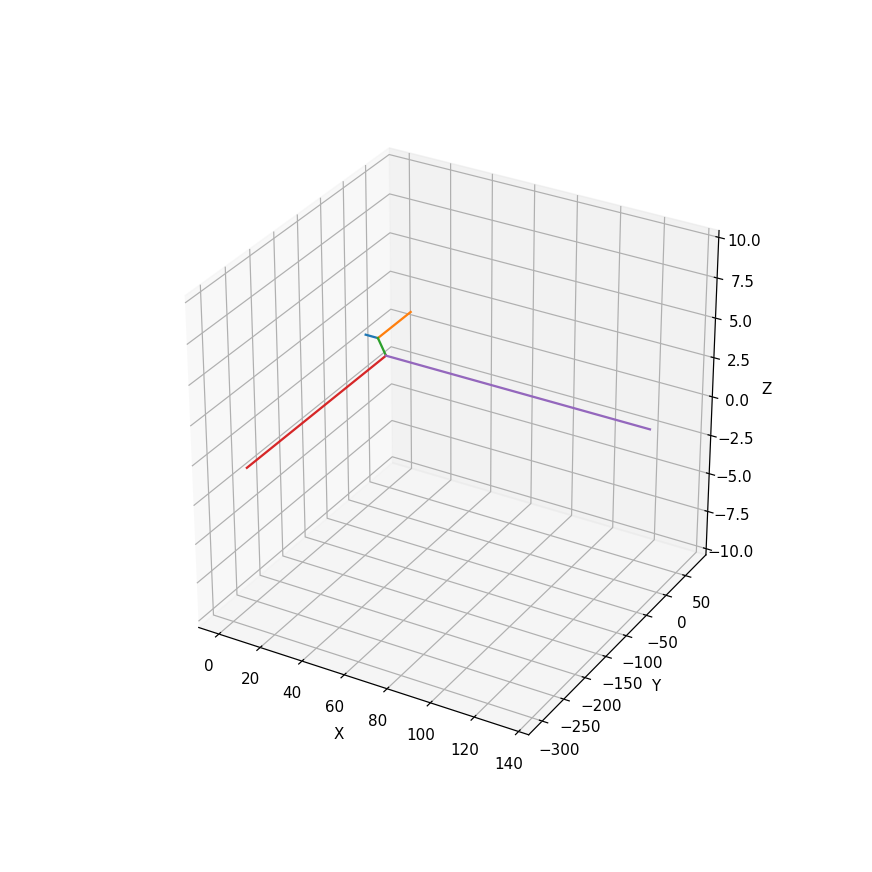

(-10, 10)

In [4]:
%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

lc = sqrt(Lc*Lc-h*h)
X = [0, La, La, La+lc, La+lc, La+Ld+lc]
Y = [0, 0,  Lb, 0, -Le, 0]
Z = [h, h,  h,  0, 0, 0]

ax.plot(X[:2], Y[:2], Z[:2])
ax.plot(X[1:3], Y[1:3], Z[1:3])
ax.plot(X[1:4:2], Y[1:4:2], Z[1:4:2])
ax.plot(X[3:5], Y[3:5], Z[3:5])
ax.plot(X[3:6:2], Y[3:6:2], Z[3:6:2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_zlim([-10,10])